In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from model import CNN_Transformer
from dataset import load_NASA, BatteryDataset


NUM_CYCLES = 3
# Load data
battery_dict = load_NASA(folder='NASA_DATA', scale_data=True)
dataset = BatteryDataset(battery_dict, num_cycles=NUM_CYCLES)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
def plot_capacity_sequence(battery_dict, num_cycles):
    for name in battery_dict:
        soh_labels = []
        soh_preds = []
        data, caps = battery_dict[name]['data'], battery_dict[name]['cap']
        for i in range(len(data)-num_cycles):
            input_stream = data[i:i+num_cycles]
            soh_labels.append(caps[i+num_cycles-1])
            # pred = model(data, caps[:-1])
            # soh_preds.append(pred)
        plt.plot(soh_labels)
        plt.show()
        break


In [ ]:
plot_capacity_sequence(battery_dict, num_cycles=3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import yaml
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from model import CNN_Transformer
from dataset import load_NASA, BatteryDataset

# Load the YAML configuration file
with open('config.yaml', 'r') as file:
    cfg = yaml.safe_load(file)

# # Access the variables
NUM_CYCLES = cfg['NUM_CYCLES']
EPOCHS = cfg['EPOCHS']
LEARNING_RATE = cfg['LEARNING_RATE']
BATCH_SIZE = cfg['BATCH_SIZE']

# Load data
battery_dict = load_NASA(folder='NASA_DATA', scale_data=True)
dataset = BatteryDataset(battery_dict, num_cycles=NUM_CYCLES)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# NN model
model = CNN_Transformer(num_cycles=NUM_CYCLES)

/Users/amir-mac/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
model = torch.load('trained_model_20e_0006.pt')

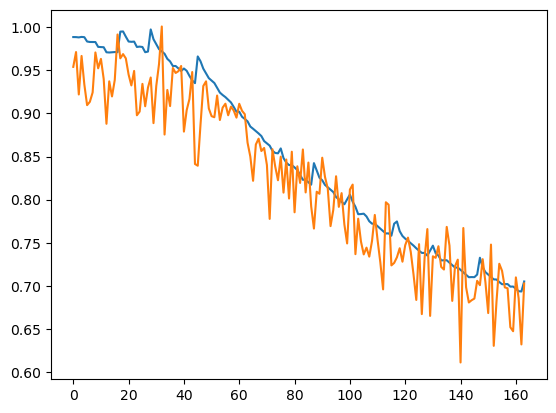

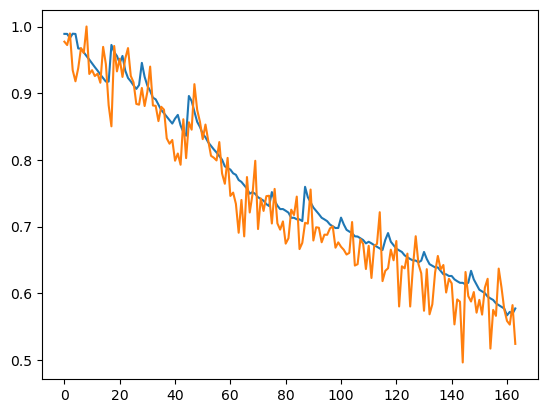

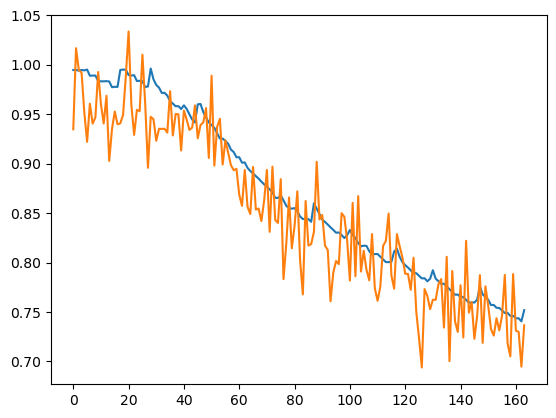

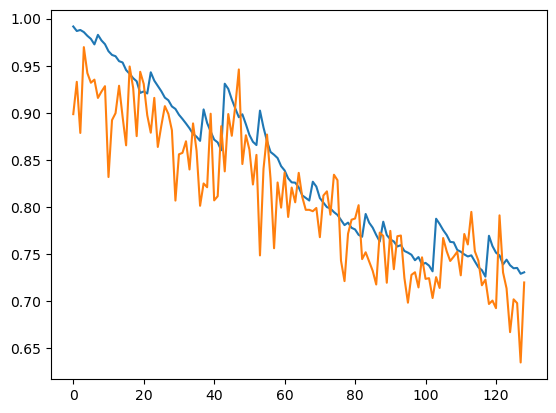

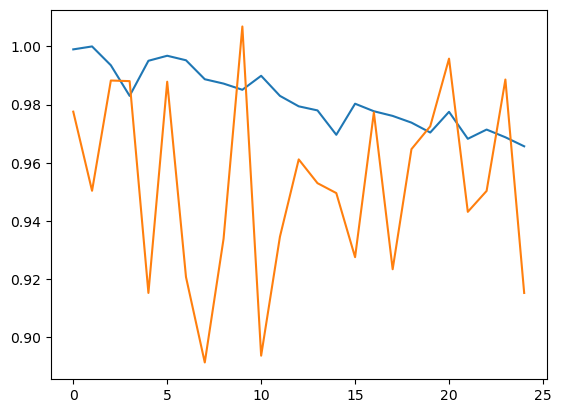

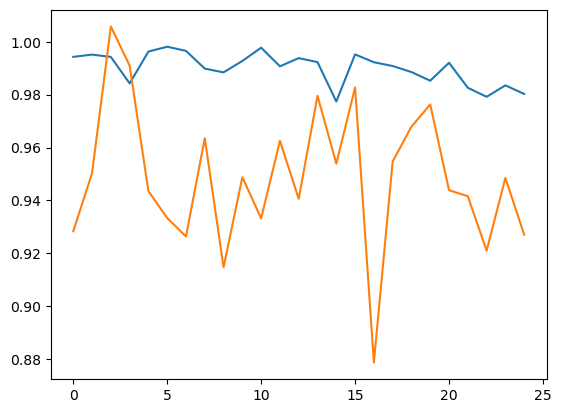

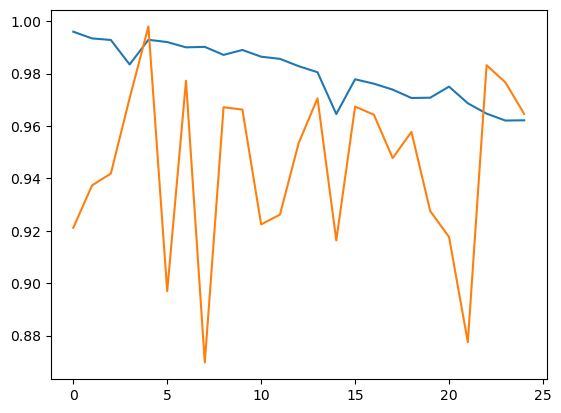

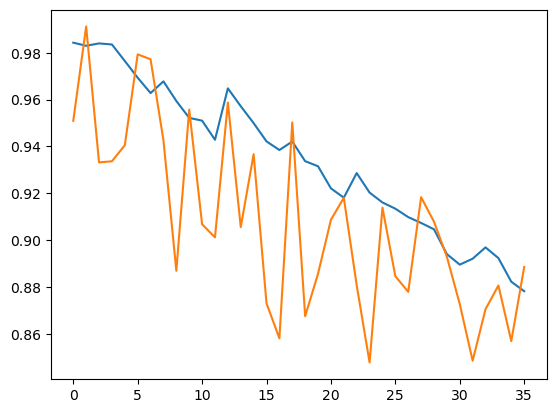

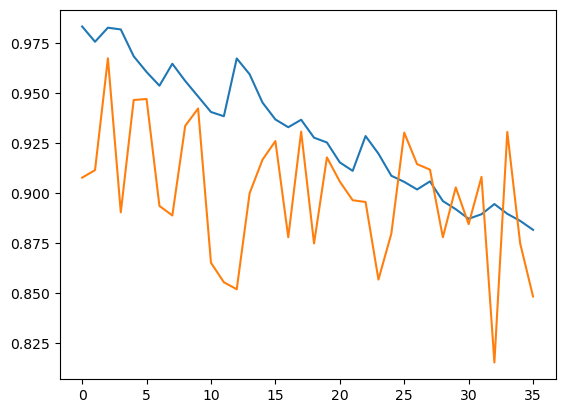

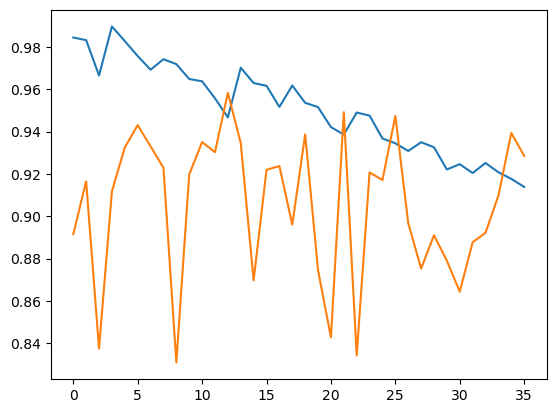

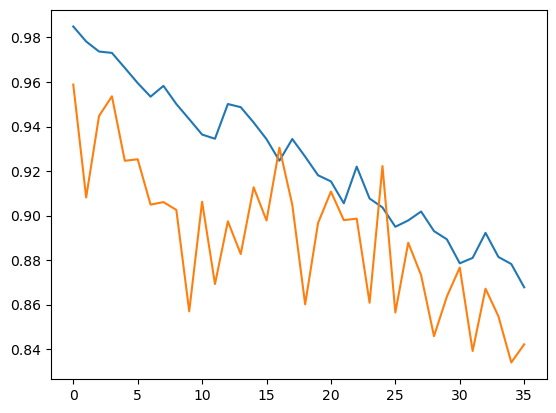

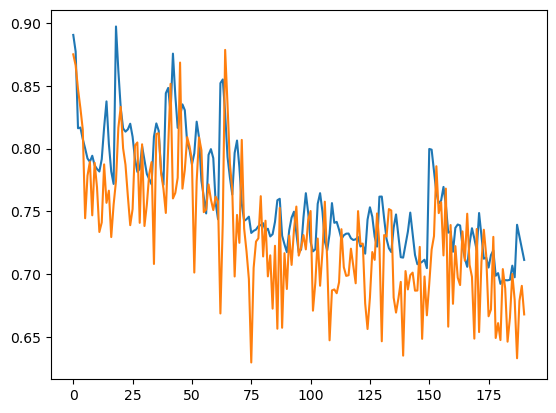

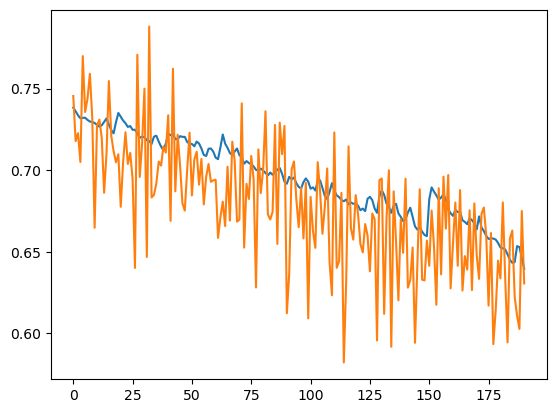

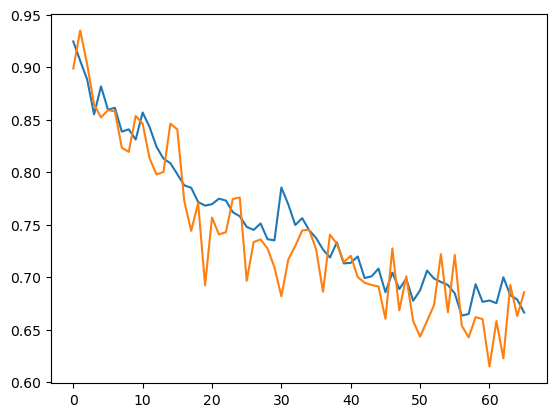

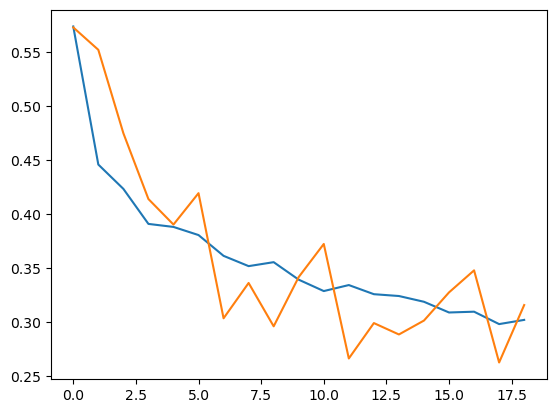

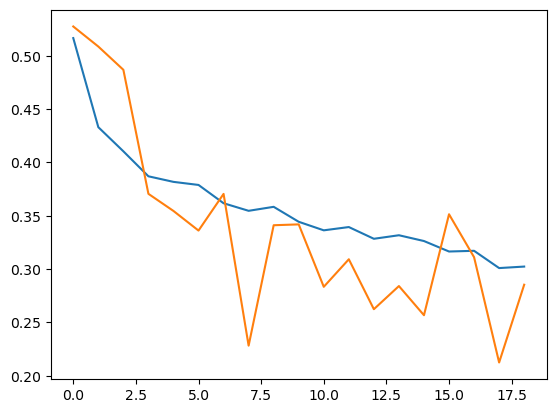

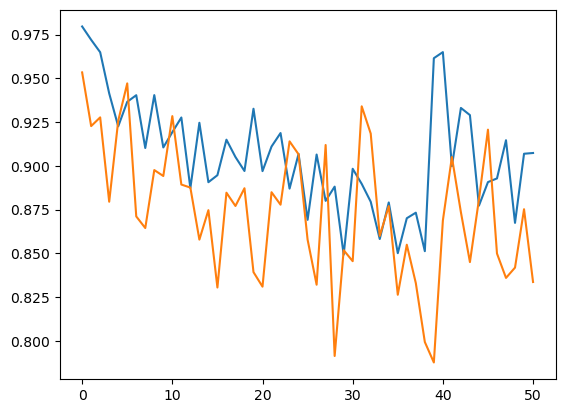

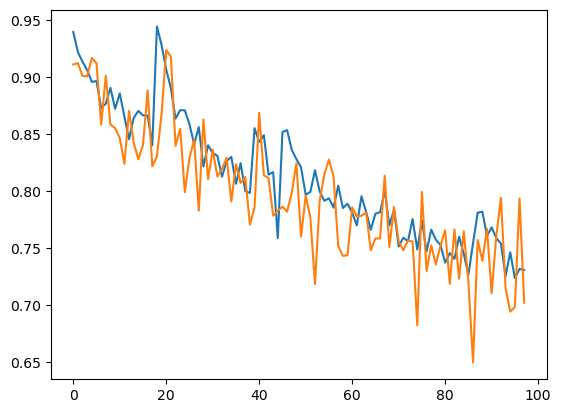

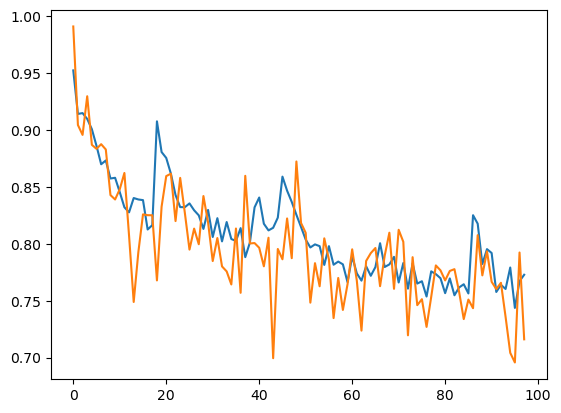

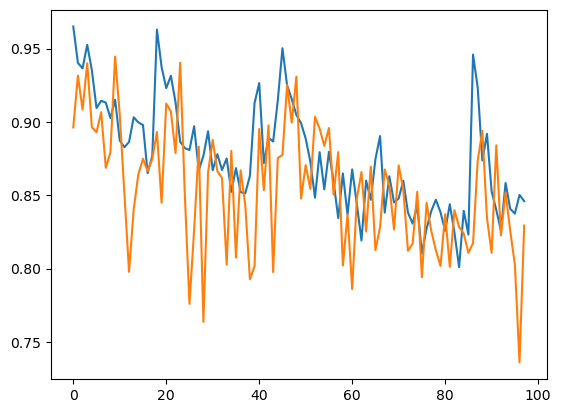

In [23]:
num_cycles = 3
for name in battery_dict:
    soh_labels = []
    soh_preds = []
    data, caps = battery_dict[name]['data'], battery_dict[name]['cap']
    for i in range(len(data)-num_cycles):
        input_stream = data[i:i+num_cycles]
        soh_labels.append(caps[i+num_cycles-1])
        input_stream = torch.tensor(input_stream).unsqueeze(0).float()
        cap_stream = torch.tensor(caps[i:i+num_cycles-1]).unsqueeze(0).float()
        pred = model(input_stream, cap_stream)
        soh_preds.append(pred.detach().numpy())
    soh_labels = np.array(soh_labels)
    soh_preds = np.array(soh_preds)
    plt.plot(soh_labels)
    plt.plot(soh_preds.ravel())

    plt.show()
    
